<h1>Atividade 01 - CCF493</h1>     

<h3>Nome: Vítor Luís G. Silva</h3> 
<h3>Matrícula: 3045</h3> 

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [17]:
# Leitura do arquivo csv
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

# Troca de NaN para 0
df_train = df_train.replace(np.nan, 0)
df_test = df_test.replace(np.nan, 0)

# Trocar dados na coluna 'Sex' para numéricos
df_train = df_train.replace(['male'], 0)
df_train = df_train.replace(['female'], 1)
df_test = df_test.replace(['male'], 0)
df_test = df_test.replace(['female'], 1)

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,S


In [5]:
# Treinamento do Kmeans
useful_columns = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

survived = df_train['Survived']
kmeans = KMeans(n_clusters=2).fit(df_train[useful_columns])

In [7]:
def print_labels(model, df, survived):
    plt.figure(figsize=(10,3))

    #Real
    plt.subplot(1,2,1)
    sns.scatterplot(x=df['PassengerId'], y=df['Age'], hue=survived, s=40)
    plt.title('Classificação Real')

    #K-Means
    plt.subplot(1,2,2)
    sns.scatterplot(x=df['PassengerId'], y=df['Age'], hue=model.labels_, s=40)
    plt.title('Classificação K-Means') 
    
    plt.show()

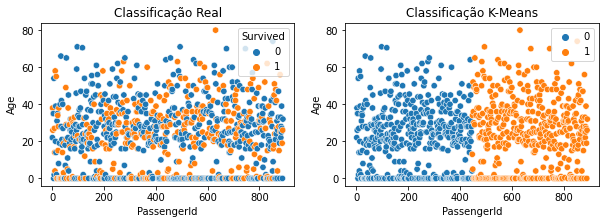

Silhueta: 0.5925


In [11]:
print_labels(kmeans, df_train[useful_columns], survived)
print('Silhueta:', round(metrics.silhouette_score(df_train[useful_columns], kmeans.labels_), 4))

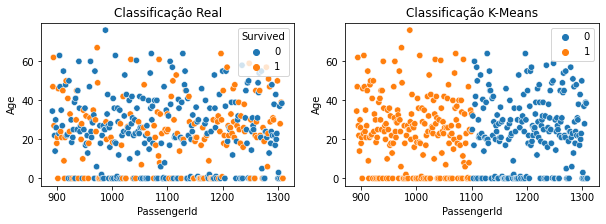

Silhueta: 0.5286


In [13]:
kmeans = KMeans(n_clusters=2).fit(df_test[useful_columns])
print_labels(kmeans, df_test[useful_columns], survived)
print('Silhueta:', round(metrics.silhouette_score(df_test[useful_columns], kmeans.labels_), 4))

In [23]:
df_map = pd.DataFrame()
df_map['PassengerId'] = df_test['PassengerId']
df_map['Survived'] = kmeans.labels_

df_map

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [25]:
df_map.to_csv('./data/result.csv', index=False)